In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C://Users/USER/Desktop/datasets/diabetes_data_upload.csv')

In [3]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [4]:
before = ['sudden weight loss', 
          'Genital thrush', 
          'visual blurring', 
          'delayed healing', 
          'partial paresis', 
          'muscle stiffness']

after = ['Sudden_Weight_Loss', 
          'Genital_Thrush', 
          'Visual_Blurring', 
          'Delayed_Healing', 
          'Partial_Paresis', 
          'Muscle_Stiffness']
df = df.rename(columns={i:j for i, j in zip(before, after)})

In [5]:
df_positive = df[df['class'] == 'Positive']

In [6]:
def part_col(data, column_name):
    data = data[data[column_name] == 'Yes'].groupby('Gender')[column_name].count()
    return data

In [7]:
def pie_chart(labels, values, column):
    def label(pct, allvals):
        return "{}".format(int(round((pct/100)*np.sum(allvals),0)))
    plt.figure(figsize=(6,6))
    plt.title('count of {} to positive diabetes'.format(column), fontsize=15, color='royalblue')
    plt.pie(values, 
            autopct=lambda pct: label(pct, values), 
            labels=labels, pctdistance=.75,
            wedgeprops=dict(width=.5, edgecolor='skyblue'), 
            textprops=dict(size=15, weight='bold', 
                           color='royalblue'),
            colors=['white','skyblue'])
    plt.show()

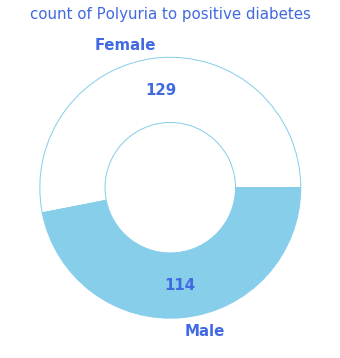

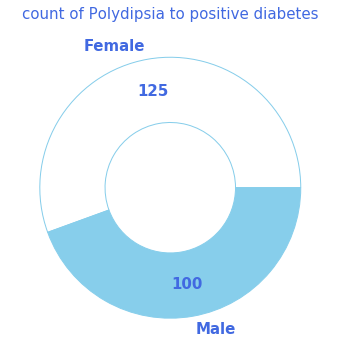

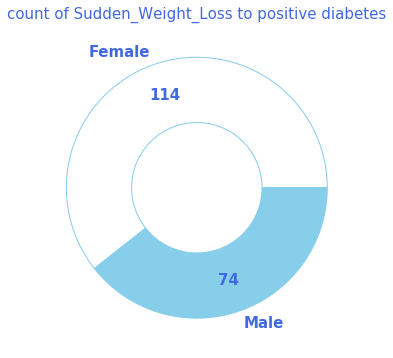

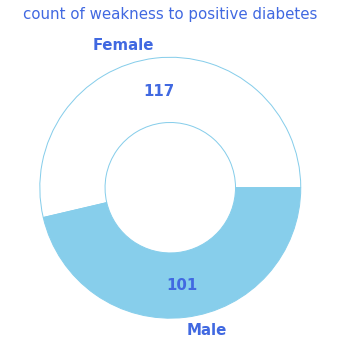

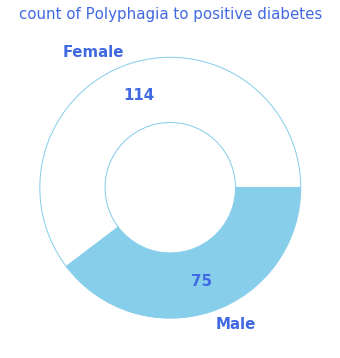

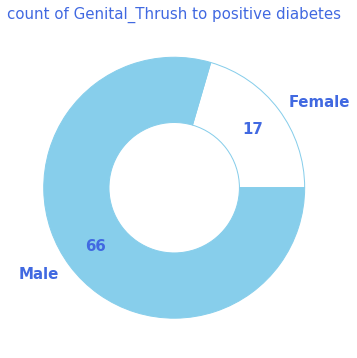

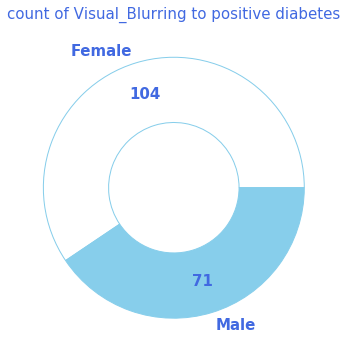

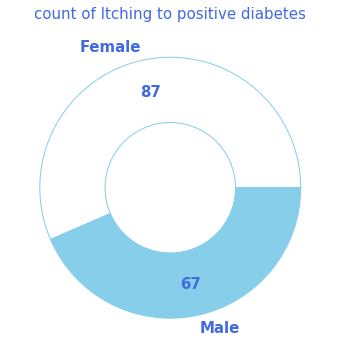

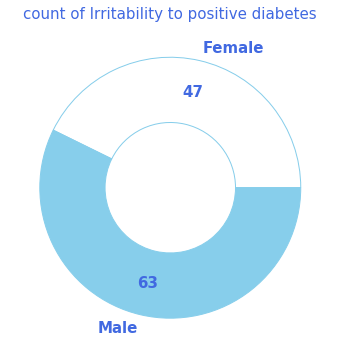

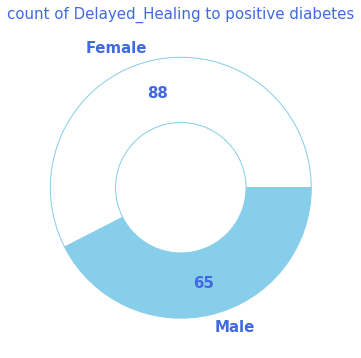

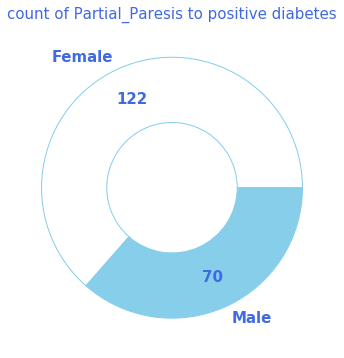

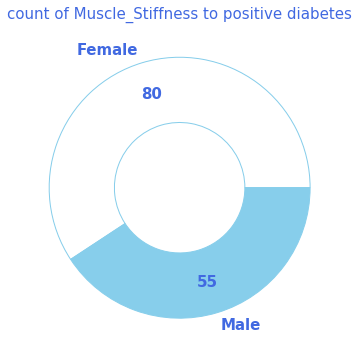

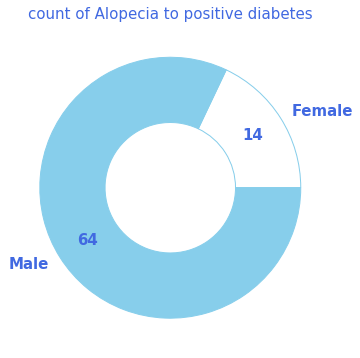

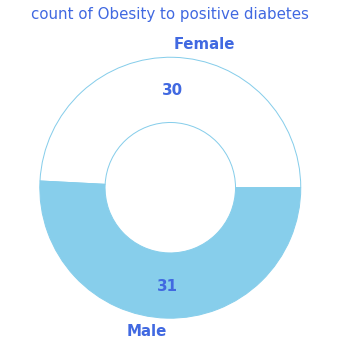

In [8]:
for column in df_positive.columns[2:-1]:
    pie_chart(list(part_col(df_positive, column).index), 
              list(part_col(df_positive, column).values), 
              part_col(df_positive, column).name)  

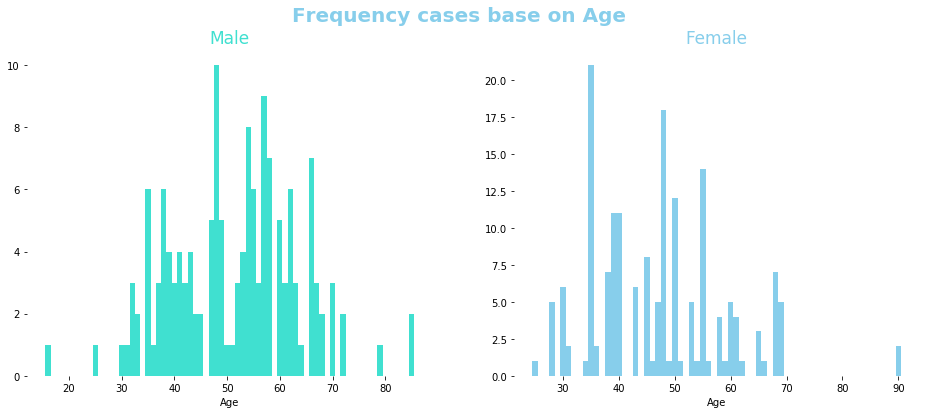

In [9]:
m = df_positive[df_positive['Gender'] == 'Male'].groupby('Age')['Age'].count()
f = df_positive[df_positive['Gender'] == 'Female'].groupby('Age')['Age'].count()

fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.suptitle('Frequency cases base on Age', fontsize=20, weight='bold', color='skyblue')
ax[0].bar(m.index, m.values, color='turquoise', width=1)
ax[1].bar(f.index, f.values, color='skyblue',width=1)
ax[0].set_title('Male', color='turquoise', fontsize=17)
ax[1].set_title('Female', color='skyblue', fontsize=17)
ax[0].set_frame_on(0)
ax[1].set_frame_on(0)
ax[0].set_xlabel('Age')
ax[1].set_xlabel('Age')
plt.show()

# Conversion Categorical data to Numerical data

In [10]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x=='Male' else 0)
for i in df.iloc[:,2:-1].columns:
    df[i] = df[i].apply(lambda x: 1 if x=='Yes' else 0)

In [11]:
df['class'] = df['class'].apply(lambda x: 1 if x=='Positive' else 0)

In [12]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'Sudden_Weight_Loss',
       'weakness', 'Polyphagia', 'Genital_Thrush', 'Visual_Blurring',
       'Itching', 'Irritability', 'Delayed_Healing', 'Partial_Paresis',
       'Muscle_Stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

# Importing Classification Models from Scikit-Learn Package

In [13]:
from sklearn.tree import *
from sklearn.svm import *
from sklearn.naive_bayes import *
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.gaussian_process import *
from sklearn.metrics import *
from sklearn.model_selection import *

In [14]:
X = df.drop('class',axis=1).values
y = df['class'].values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=42)

In [15]:
algorithms = {'Random Forest':RandomForestClassifier(), 
              'Decision Tree':DecisionTreeClassifier(), 
              'Support Vector Machine':SVC(), 
              'linear Support Vector Machine':LinearSVC(),
              'Nu Support Vector Machine':NuSVC(),
              'Logistic Regression':LogisticRegression(),
              'Logistic Regression CV':LogisticRegressionCV(),
              'Ridge':RidgeClassifier(),
              'Ridge CV':RidgeClassifierCV(),
              'SDG':SGDClassifier(),
              'Ada Boost':AdaBoostClassifier(), 
              'Categorical Naive Bayes':CategoricalNB(), 
              'Bernoulli Naive Bayes':BernoulliNB(),
              'Multinomial Naive Bayes':MultinomialNB(),
              'Bagging':BaggingClassifier(), 
              'Gradient Boost':GradientBoostingClassifier(),
              'Extra Tree':ExtraTreesClassifier(),
              'Gaussian Process':GaussianProcessClassifier()}

In [16]:
def model(Xtrain, Xtest, ytrain, ytest, algorithm):
    model = algorithm
    model.fit(Xtrain, ytrain)
    pred = model.predict(Xtest)
    return pred

In [17]:
f1_score = [f1_score(ytest, model(Xtrain, Xtest, ytrain, ytest, alg)) for alg in list(algorithms.values())]
accuracy = [accuracy_score(ytest, model(Xtrain, Xtest, ytrain, ytest, alg)) for alg in list(algorithms.values())]
recall = [recall_score(ytest, model(Xtrain, Xtest, ytrain, ytest, alg)) for alg in list(algorithms.values())]
precision = [precision_score(ytest, model(Xtrain, Xtest, ytrain, ytest, alg)) for alg in list(algorithms.values())]
auc = [roc_auc_score(ytest, model(Xtrain, Xtest, ytrain, ytest, alg)) for alg in list(algorithms.values())]

In [18]:
pd.DataFrame({'Accuracy':accuracy, 'F1 score':f1_score, 'Recall':recall, 'Precision':precision, 'AUC score':auc}, index=algorithms.keys())

,Accuracy,F1 score,Recall,Precision,AUC score
Random Forest,0.980769,0.980695,0.969697,1.000000,0.981061
Decision Tree,0.966346,0.976744,0.939394,1.000000,0.973485
Support Vector Machine,0.634615,0.776471,1.000000,0.634615,0.500000
linear Support Vector Machine,0.860577,0.906977,0.893939,0.959016,0.768740
Nu Support Vector Machine,0.908654,0.924901,0.886364,0.966942,0.916866
Logistic Regression,0.923077,0.937984,0.916667,0.960317,0.925439
Logistic Regression CV,0.903846,0.921260,0.886364,0.959016,0.910287
Ridge,0.879808,0.898785,0.840909,0.965217,0.894139
Ridge CV,0.884615,0.903226,0.848485,0.965517,0.897927
SDG,0.634615,0.923695,1.000000,0.764706,0.898325
